In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from myfunc import timer
from myfunc import DirMan
import config
import matplotlib

pd.set_option('display.max_columns', None)
font = {'family': 'Times New Roman'}
matplotlib.rc('font', **font)

resolution = config.resolution
region     = config.region
data_path  = config.data_path
shp_path   = config.shp_path
fig_path   = config.fig_path

print(data_path)

df = pd.read_csv(f'/tera11/zhwei/students/Xionghui/data/run/{resolution}/csv/Global_igbp_koppen.csv')
df

/tera11/zhwei/students/Xionghui/data/run/0p1/


,Unnamed: 0,lat,lon,Sbedrock,Area,Koppen,IGBP
0,1250334,-55.25,-66.55,4.320986,70479960.0,29,5
1,1261124,-54.95,-67.55,2.827930,71010940.0,29,4
2,1261139,-54.95,-66.05,92.192160,71010940.0,29,9
3,1264742,-54.85,-65.75,39.953026,71187510.0,29,1
4,1264743,-54.85,-65.65,32.279675,71187510.0,29,1
...,...,...,...,...,...,...,...
169848,5910459,74.15,105.95,3.792372,33773776.0,29,7
169849,5921289,74.45,108.95,59.713875,33150462.0,29,7
169850,5928325,74.65,92.55,15.885224,32734400.0,29,7
169851,5931949,74.75,94.95,56.937702,32526226.0,29,7


In [141]:
## group together Koppen first and second letter groups
df_Koppen = df.copy()
df_Koppen = df_Koppen[df_Koppen['Koppen'] > 0]
df_Koppen = df_Koppen[df_Koppen['Koppen'] < 29]
df_Koppen['Koppen_Together'] = df_Koppen['Koppen'].replace(to_replace=[5, 7, 9, 10, 12, 13, 15, 16, 18, 19, 20, 22, 23, 24, 26, 27, 28], value=[4, 6, 8, 8, 11, 11, 14, 14, 17, 17, 17, 21, 21, 21, 25, 25, 25])

# Grouped first and second letters of koppen climate types:
#5 to 4
#7 to 6
#9, 10 to 8
#13, 12 to 11
#16, 15 to 14
#20, 19, 18 to 17
#24, 23, 22 to 21
#28, 27, 26 to 25
#29 alone

## Check that no Koppen groups have less than 200km area
# print('Area of each group (km^2):')

# Remove 2 and 3
# df_Koppen = df_Koppen[df_Koppen['Koppen_Together'] > 3]
# df_Koppen = df_Koppen[df_Koppen['Koppen_Together'] != 21]

# print('Koppen Area:')
koppen_area_sum = df_Koppen.groupby('Koppen_Together')['Area'].sum().sort_values(ascending=False)
# print(koppen_area_sum/1e12)

df_Koppen_reorder = df_Koppen.merge(koppen_area_sum, how='left', on='Koppen_Together', suffixes=('', '_sum'))
df_Koppen_sorted = df_Koppen_reorder.sort_values(by='Area_sum', ascending=False)
df_Koppen_sorted.reset_index(drop=True, inplace=True)
# print(df_Koppen_sorted['Koppen_Together'].max())

# Setup dataframe with all Koppen Groups, Values, and Colors
# KoppenColor = ['#0000FE','#0077FF','#46A9FA','#FE0000',
#                '#FE9695','#F5A301','#FFDB63','#FDFD45',
#                '#C6C700','#96FF96','#63C764','#329633',
#                '#C6FF4E','#66FF33','#33C701','#FF00FE',
#                '#C600C7','#963295','#966495','#ABB1FF',
#                '#5A77DB','#4C51B5','#320087','#18DCDC',
#                '#38C7FF','#007E7D','#00455E','#B2B2B2',
#                '#686868']
KoppenColor =   ['#0000FF', '#0078FF', '#46AAFA', '#FF0000', 
                 '#FF9696', '#F5A500', '#FFDC64', '#FFFF00', 
                 '#C8C800', '#969600', '#96FF96', '#64C864', 
                 '#329632', '#C8FF50', '#64FF32', '#32C800',  
                 '#FF00FF', '#C800C8', '#963296', '#966496', 
                 '#AAAFFF', '#5A78DC', '#4B50B4', '#320087', 
                 '#00FFFF', '#37C8FF', '#007D7D', '#00465F', 
                 '#B3B3B3', '#666666']
KoppenList = ['Tropical Rainforest (Af)','Tropical Monsoon (Am)','Tropical Savanna (Aw)',
              'Desert (BWh)','Arid (BWk)',
              'Semi Arid (BSh)','Semi Arid (BSk)',
              'Mediterranean (Csa)','Mediterranean (Csb)','Mediterranean (Csc)',
              'Humid Subtropical (Cwa)','Oceanic (Cwb)','Ocanic (Cwc)',
              'Humid Subtropical (Cfa)','Oceanic (Cfb)','Oceanic (Cfc)',
              'Humid Continental (Dsa)','Humid Continental (Dsb)','Subarctic (Dsc)','Subarctic (Dsd)',
              'Humid Continental (Dwa)','Humid Continental (Dwb)','Subarctic (Dwc)','Subarctic (Dwd)',
              'Humid Continental (Dfa)','Humid Continental (Dfb)','Subarctic (Dfc)','Subarctic (Dfd)',
              'Tundra (ET)', 'Tundra (EF)']
KoppenList_short = ['Tropical Rainforest (Af)','Tropical Monsoon (Am)','Tropical Savanna (Aw)',
                    'Desert & Arid (BW)','Arid (BWk)',
                    'Semi Arid (BS)','Semi Arid (BSk)',
                    'Mediterranean (Cs)','Mediterranean (Csb)','Mediterranean (Csc)',
                    'Humid Subtropical &\nOceanic (Cw)','Oceanic (Cwb)','Ocanic (Cwc)',
                    'Humid Subtropical &\nOceanic (Cf)','Oceanic (Cfb)','Oceanic (Cfc)',
                    'Humid Continental &\nSubarctic (Ds)','Humid Continental (Dsb)','Subarctic (Dsc)','Subarctic (Dsd)',
                    'Humid Continental &\nSubarctic (Dw)','Humid Continental (Dw)','Subarctic (Dwc)','Subarctic (Dwd)',
                    'Humid Continental &\nSubarctic (Df)','Humid Continental (Dfb)','Subarctic (Dfc)','Subarctic (Dfd)',
                    'Tundra (ET)', 'Tundra (EF)']

KoppenColors = pd.DataFrame()
KoppenColors['color'] = KoppenColor
KoppenColors['name'] = KoppenList_short
KoppenColors['number'] = np.arange(1,31, step = 1)

# print(KoppenColors)

# Filter Koppen data and aesthetics by group for plotting:
koppen_ids = df_Koppen['Koppen_Together'].unique()
aesthetics = KoppenColors[KoppenColors.number.isin(koppen_ids)]

# print(aesthetics)

aesthetics_reorder = KoppenColors[KoppenColors.number.isin(koppen_ids)].copy()
aesthetics_reorder['area_sum'] = aesthetics_reorder['number'].map(koppen_area_sum)
aesthetics_reorder = aesthetics_reorder.sort_values(by='area_sum', ascending=False)
aesthetics_reorder.reset_index(drop=True, inplace=True)


# print('Reorder Unique Koppen Color is:')
# print(aesthetics_reorder['color'].unique())
# print(aesthetics_reorder['number'].unique())
# print(aesthetics_reorder['color'].unique())

# print(df_Koppen_sorted)
print(aesthetics_reorder)

      color                                 name  number      area_sum
0   #00FFFF  Humid Continental &\nSubarctic (Df)      25  3.617973e+12
1   #46AAFA                Tropical Savanna (Aw)       3  3.374400e+12
2   #C8FF50    Humid Subtropical &\nOceanic (Cf)      14  1.843266e+12
3   #96FF96    Humid Subtropical &\nOceanic (Cw)      11  1.787343e+12
4   #0078FF                Tropical Monsoon (Am)       2  1.281488e+12
5   #0000FF             Tropical Rainforest (Af)       1  1.078389e+12
6   #AAAFFF  Humid Continental &\nSubarctic (Dw)      21  9.139471e+11
7   #FF0000                   Desert & Arid (BW)       4  7.955736e+11
8   #F5A500                       Semi Arid (BS)       6  5.296958e+11
9   #FFFF00                   Mediterranean (Cs)       8  4.976878e+11
10  #FF00FF  Humid Continental &\nSubarctic (Ds)      17  2.861319e+11


In [164]:
print(df_Koppen_sorted.groupby('Koppen_Together')['Sbedrock'].median())

Koppen_Together
1     132.453750
2     267.899100
3     249.975745
4      38.142406
6      90.731162
8     191.579130
11    199.727665
14     83.874570
17     63.372798
21     27.036724
25     43.462336
Name: Sbedrock, dtype: float64


/tmp/ipykernel_389760/2454955422.py:4: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxenplot(x="Koppen_Together", y="Sbedrock", data=df_Koppen_sorted, linewidth=3,


[3618 3374 1843 1787 1281 1078  914  796  530  498  286]


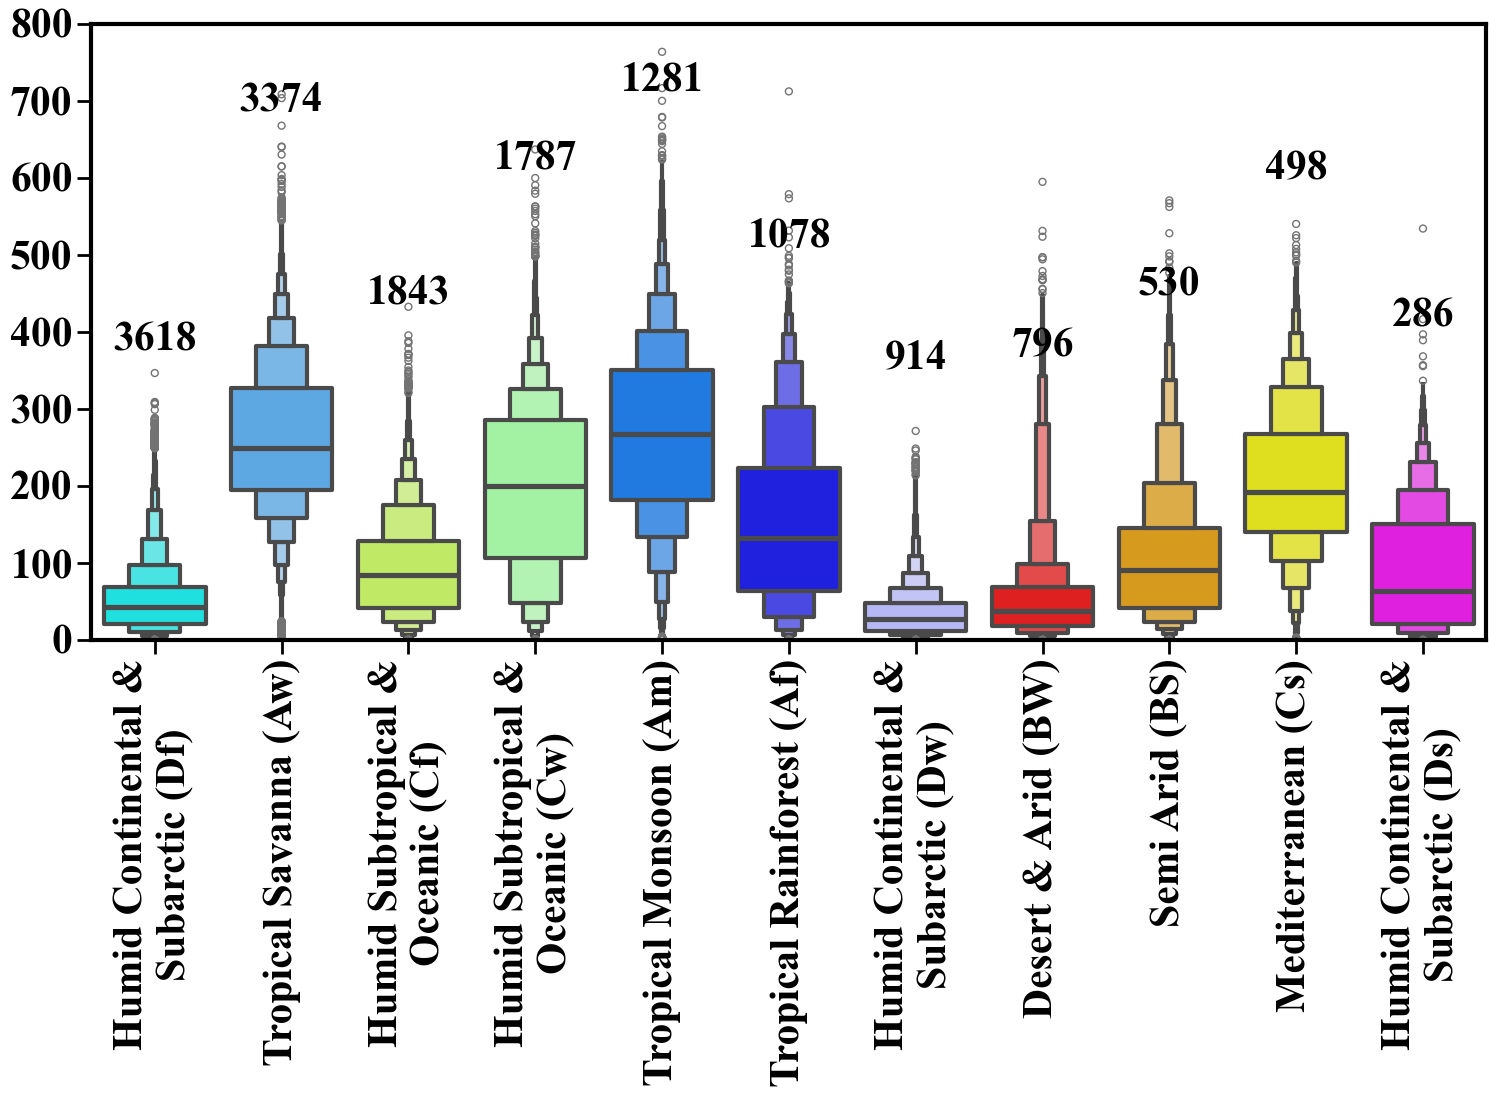

In [151]:
fig = plt.figure(figsize=(18, 8))

aesthetics_reorder_sorted = aesthetics_reorder.sort_values(by='number', ascending=True)
sns.boxenplot(x="Koppen_Together", y="Sbedrock", data=df_Koppen_sorted, linewidth=3,
              hue='Koppen_Together',palette=aesthetics_reorder_sorted['color'].unique(),
              order=aesthetics_reorder['number'].unique(),legend=False,    
              k_depth="proportion", outlier_prop=0.0078125, showfliers=True)
                
ax = plt.gca()

ax.tick_params(axis='x', which='major', length=10, width=2, direction='out')
ax.tick_params(axis='y', which='major', length=10, width=2, direction='out')

for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(3)  

area_name = (aesthetics_reorder['area_sum'].unique()/1e9).round().astype(int)
print(area_name)
for i, label in enumerate(ax.get_xticklabels()):
    x_pos = label.get_position()[0]
    median_value = df_Koppen_sorted[df_Koppen_sorted['Koppen_Together']==aesthetics_reorder['number'].unique()[i]]['Sbedrock'].median()
    ax.text(x_pos, 1.5*median_value+300, f'{area_name[i]}', ha='center', va='bottom', fontsize=30, fontweight='bold', color='black')

plt.xlabel('')  
plt.ylabel("")  

plt.xticks(ticks=(aesthetics_reorder.index), labels=aesthetics_reorder['name'].unique(), fontsize=30, fontweight='bold',rotation = 'vertical')

plt.ylim(0, 800)
yticks = np.arange(0, 900, 100)
plt.yticks(ticks=yticks, labels=yticks,fontsize=30, fontweight='bold')
plt.show()
# fig.savefig('boxenplot2.pdf')

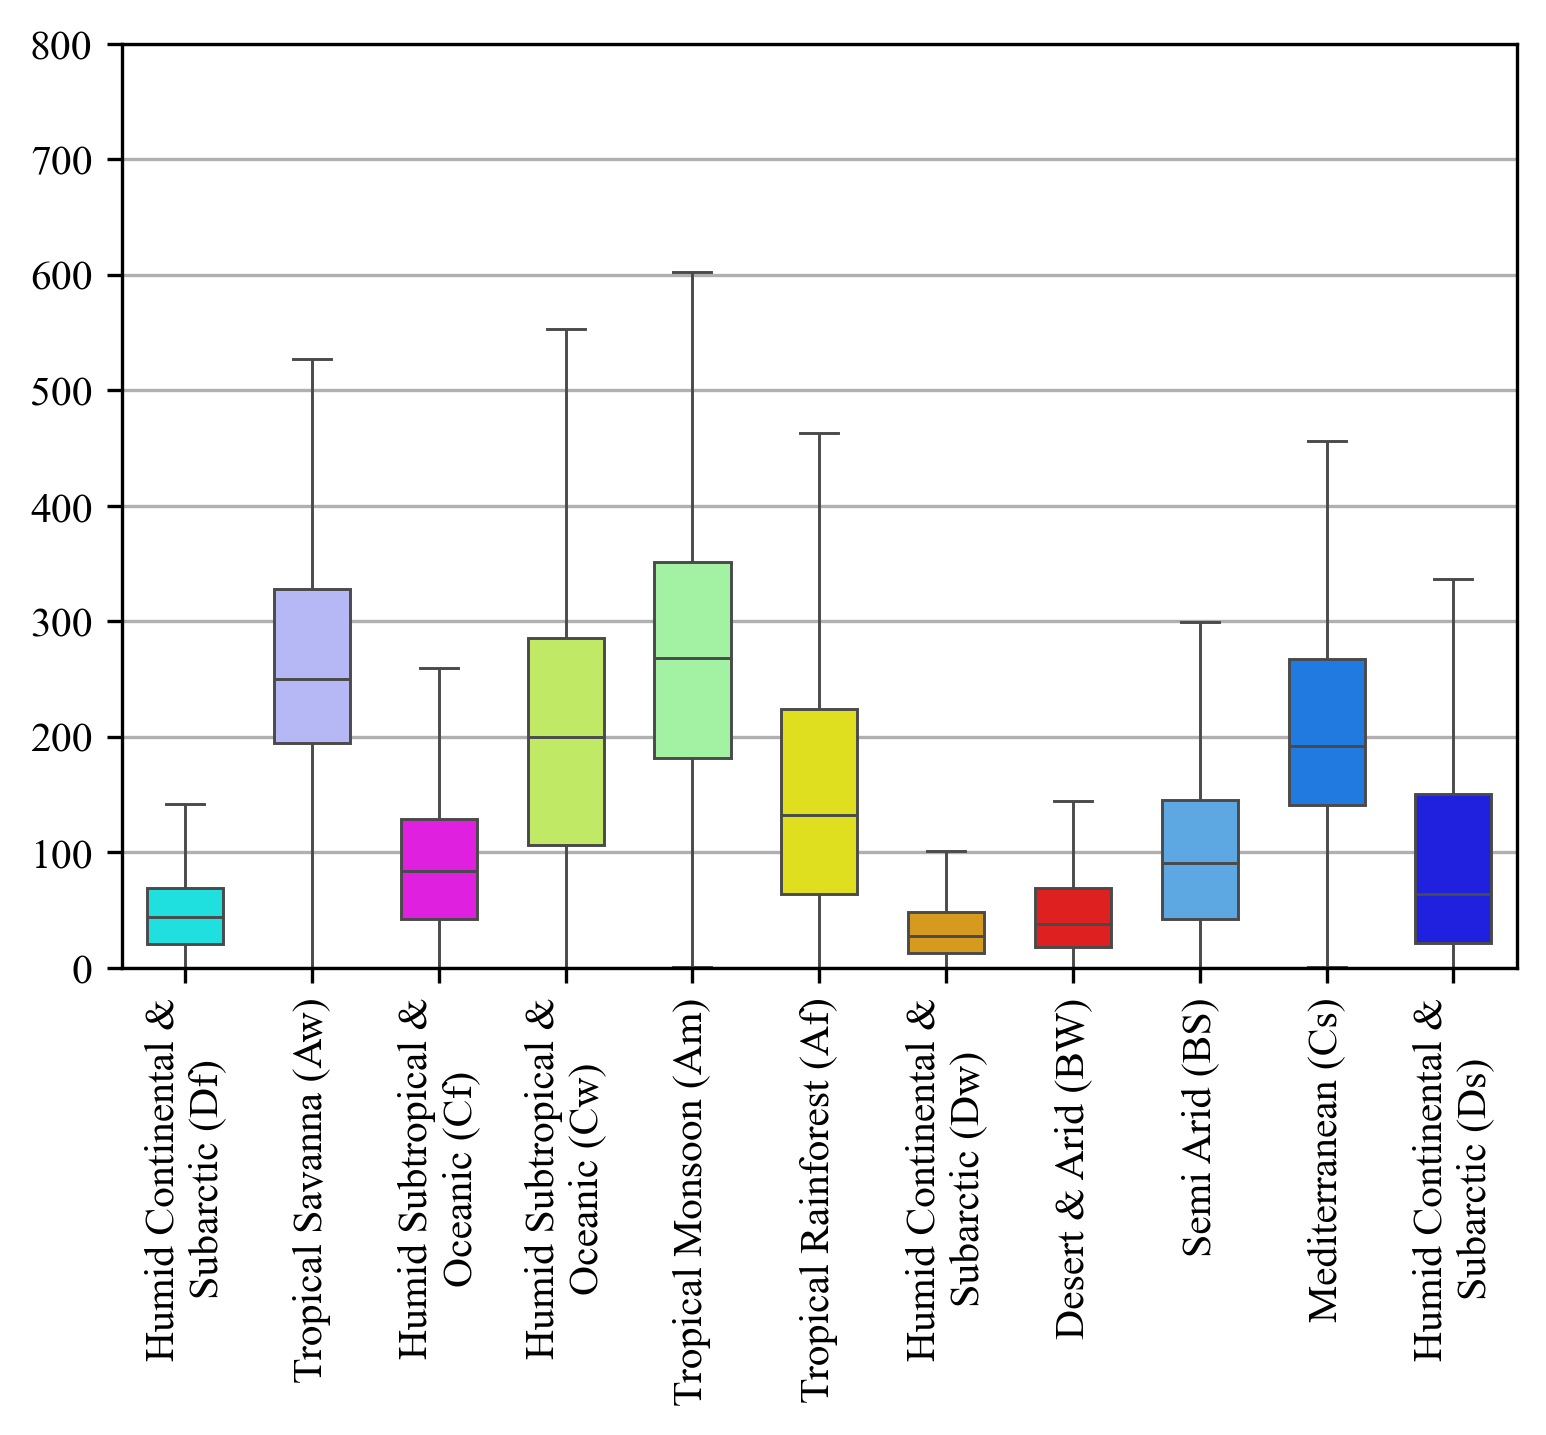

In [143]:
# set figure size
f, ax = plt.subplots(figsize=(6, 4), dpi=300) 
order = koppen_area_sum.index.tolist()
# sns.boxplot(x="Koppen_Together", y="Sbedrock", hue = "Koppen_Together", data=df_Koppen, width=.6, linewidth = .7, palette=aesthetics['color'].tolist(), whis = 1.5, showfliers = False)
sns.boxplot(x="Koppen_Together", y="Sbedrock", hue = "Area_sum", data=df_Koppen_sorted, width=.6, linewidth = .7, palette=aesthetics_reorder_sorted['color'].tolist(), whis = 1.5, showfliers = False, order=order)
plt.legend().remove()

# Tweak the visual presentation
# plt.xticks(np.arange(0, 11, step=1), labels = aesthetics['name'],rotation = 'vertical') # rotation='25', ha="right"
plt.xticks(np.arange(0, 11, step=1), labels = aesthetics_reorder['name'],rotation = 'vertical') # rotation='25', ha="right"
ax.yaxis.grid(True)
#ax.set_title('Köppen Climate Type')
ax.set_axisbelow(True)
#ax.set_xlabel(labels)
ax.set_ylim(0, 800)
ax.set_xlabel("")
ax.set_ylabel("")
#ax.set_ylabel('$S_{bedrock}$ (mm)')

# Uncomment to download fig:
plt.rcParams['pdf.fonttype'] = 42
# plt.savefig(f"{fig_path}/b1_Koppen.pdf", transparent=True, bbox_inches='tight')
# plt.savefig(f"{fig_path}/b1_Koppen_reorder.pdf", transparent=True, bbox_inches='tight')

In [144]:
## Check that no IGBP groups have less than 2km area
df_IGBP = df.copy()

#Remove IGBP 3 = Deciduous needleleaf forest
df_IGBP = df_IGBP[df_IGBP['IGBP'] < 10]
df_IGBP = df_IGBP[df_IGBP['IGBP'] > 0]
# df_IGBP = df_IGBP[df_IGBP['IGBP'] != 3]


igbp_area_sum = df_IGBP.groupby('IGBP')['Area'].sum().sort_values(ascending=False)
# print(igbp_area_sum)

df_IGBP_reorder = df_IGBP.merge(igbp_area_sum, how='left', on='IGBP', suffixes=('', '_sum'))
df_IGBP_sorted = df_IGBP_reorder.sort_values(by='Area_sum', ascending=False)
# print(df_IGBP_sorted)

lcoi = ['Evergreen Needleleaf\nForests','Evergreen Broadleaf\nForests',
        'Deciduous Needleleaf\nForests','Deciduous Broadleaf\nForests',
        'Mixed Forests',
        'Closed Shrublands','Open Shrublands',
        'Woody Savannas','Savannas','Grassland']
qgis_colors = ['#f8de85', '#FAC13E','#a5537f','#a52653',
               '#c04a02','#A4B381','#52B33F','#74B3B8',
               '#B183B8','#7846A8']
# qgis_colors = ['#05450a', '#086a10', '#54a708', '#78d203', 
#                 '#009900','#c6b044', '#dcd159', '#dade48',  
#                 '#fbff13']
IGBPList = ['Evergreen Needleleaf\nForests', 'Evergreen Broadleaf\nForests', 
            'Deciduous Needleleaf\nForests', 'Deciduous Broadleaf\nForests', 
            'Mixed Forests', 
            'Closed Shrublands', 'Open Shrublands', 
            'Woody Savannas', 'Savannas', 
            'Grasslands', 'Permanent Wetlands', 'Croplands', 
            'Urban and Built-up Lands', 'Cropland/Natural Vegetation Mosaics', 
            'Permanent Snow and Ice', 'Barren', 'Water Bodies']
land_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9,10]

land_aes = pd.DataFrame()
land_aes['name'] = lcoi
land_aes['number'] = land_numbers
land_aes['color'] = qgis_colors

# Filter Koppen data and aesthetics by group for plotting:
IGBP_ids = df_IGBP['IGBP'].unique()
land_aesthetics = land_aes[land_aes.number.isin(IGBP_ids)]

land_aesthetics_reorder = land_aes[land_aes.number.isin(IGBP_ids)].copy()
land_aesthetics_reorder['Area_sum'] = land_aesthetics_reorder['number'].map(igbp_area_sum)
land_aesthetics_reorder = land_aesthetics_reorder.sort_values(by='Area_sum', ascending=False)
land_aesthetics_reorder.reset_index(drop=True, inplace=True)
print(land_aesthetics_reorder)

                            name  number    color      Area_sum
0                       Savannas       9  #B183B8  3.444262e+12
1   Evergreen Broadleaf\nForests       2  #FAC13E  3.099629e+12
2                 Woody Savannas       8  #74B3B8  2.602005e+12
3                Open Shrublands       7  #52B33F  2.182656e+12
4                  Mixed Forests       5  #c04a02  1.849365e+12
5   Deciduous Broadleaf\nForests       4  #a52653  1.299186e+12
6              Closed Shrublands       6  #A4B381  6.767068e+11
7  Evergreen Needleleaf\nForests       1  #f8de85  5.252340e+11
8  Deciduous Needleleaf\nForests       3  #a5537f  4.139207e+11


In [158]:
print(df_IGBP_sorted.groupby('IGBP')['Sbedrock'].median())

IGBP
1     56.838000
2    190.367070
3     65.017460
4     80.379585
5     63.759590
6     81.395870
7     42.261842
8     63.192680
9    156.997900
Name: Sbedrock, dtype: float64


/tmp/ipykernel_389760/21467055.py:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxenplot(x="IGBP", y="Sbedrock", data=df_IGBP_sorted, linewidth=3,


[3444 3100 2602 2183 1849 1299  677  525  414]


([<matplotlib.axis.YTick at 0x14ae44393eb0>,
 [Text(0, 0, '0'),
  Text(0, 100, '100'),
  Text(0, 200, '200'),
  Text(0, 300, '300'),
  Text(0, 400, '400'),
  Text(0, 500, '500'),
  Text(0, 600, '600'),
  Text(0, 700, '700'),
  Text(0, 800, '800')])

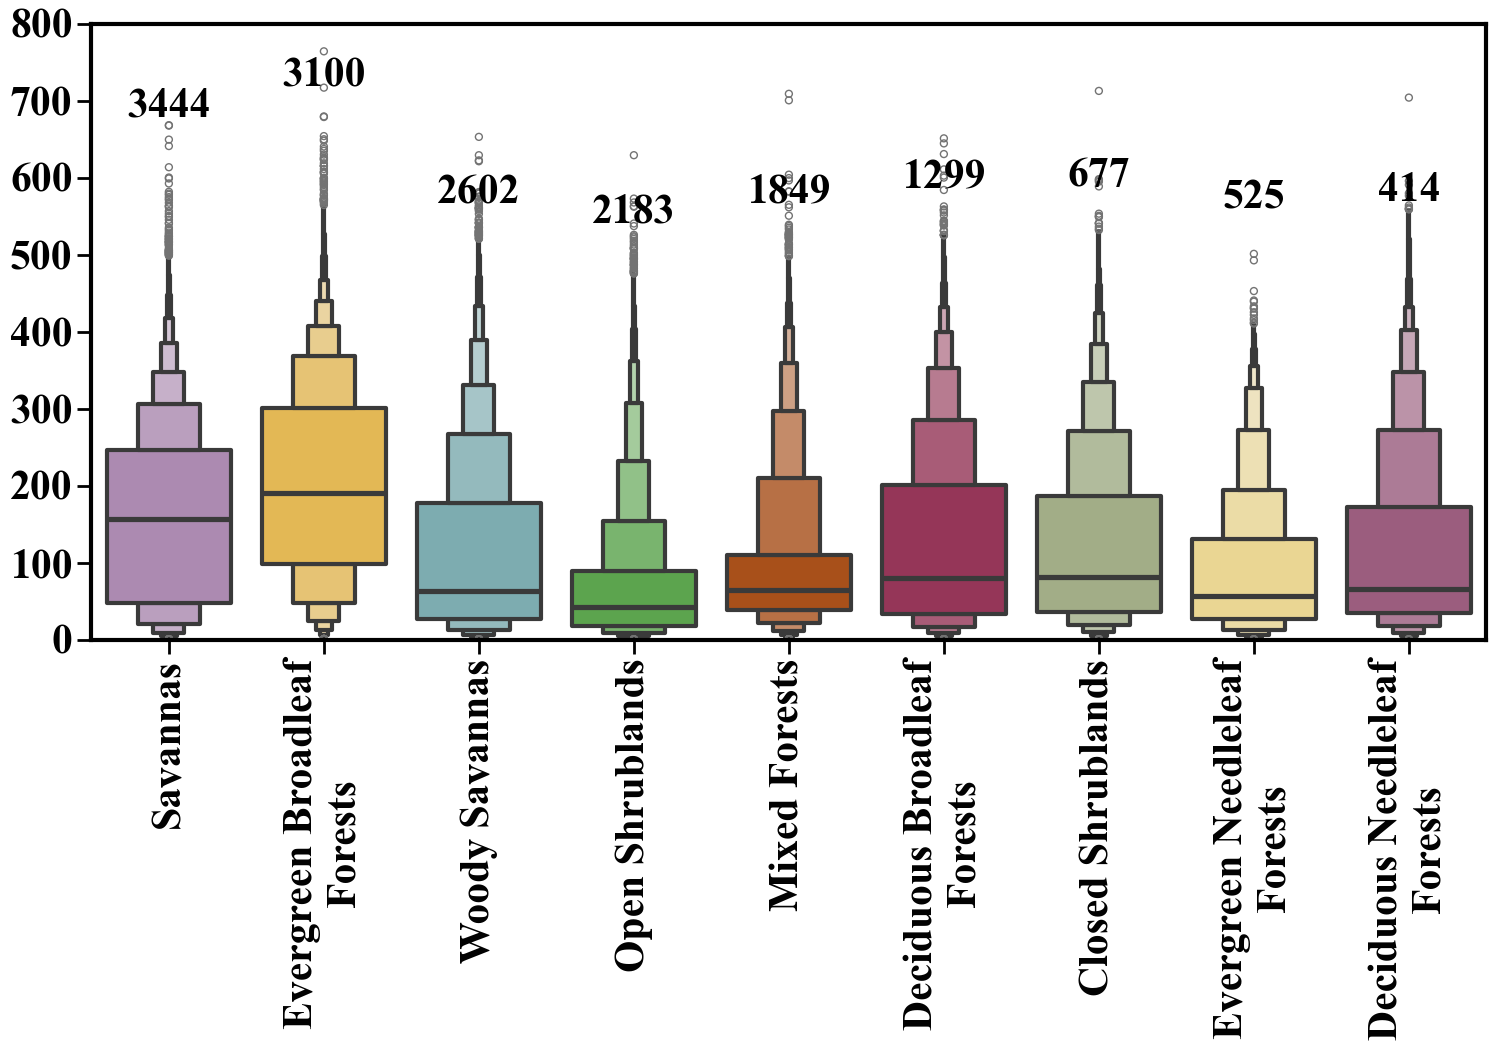

In [156]:
fig = plt.figure(figsize=(18, 8))

land_aesthetics_reorder_sorted = land_aesthetics_reorder.sort_values(by='number', ascending=True)
# print(land_aesthetics_reorder_sorted['color'].unique())
sns.boxenplot(x="IGBP", y="Sbedrock", data=df_IGBP_sorted, linewidth=3,
              hue='IGBP',palette=land_aesthetics_reorder_sorted['color'].unique(),
              order=land_aesthetics_reorder['number'].unique(), legend=False,
              k_depth="proportion", outlier_prop=0.0078125, showfliers=True)
      
ax = plt.gca()

ax.tick_params(axis='x', which='major', length=10, width=2, direction='out')
ax.tick_params(axis='y', which='major', length=10, width=2, direction='out')

for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(3)  

area_name = (land_aesthetics_reorder['Area_sum'].unique()/1e9).round().astype(int)
print(area_name)
for i, label in enumerate(ax.get_xticklabels()):
    x_pos = label.get_position()[0]
    median_value = df_IGBP_sorted[df_IGBP_sorted['IGBP']==land_aesthetics_reorder['number'].unique()[i]]['Sbedrock'].median()
    ax.text(x_pos, median_value*1.2+480, f'{area_name[i]}', ha='center', va='bottom', fontsize=30, fontweight='bold', color='black')

plt.xlabel('')  
plt.ylabel("")  

plt.xticks(ticks=(land_aesthetics_reorder.index), labels=land_aesthetics_reorder['name'].unique(), fontsize=30, fontweight='bold',rotation = 'vertical')

plt.ylim(0, 800)
yticks = np.arange(0, 900, 100)
plt.yticks(ticks=yticks, labels=yticks,fontsize=30, fontweight='bold')

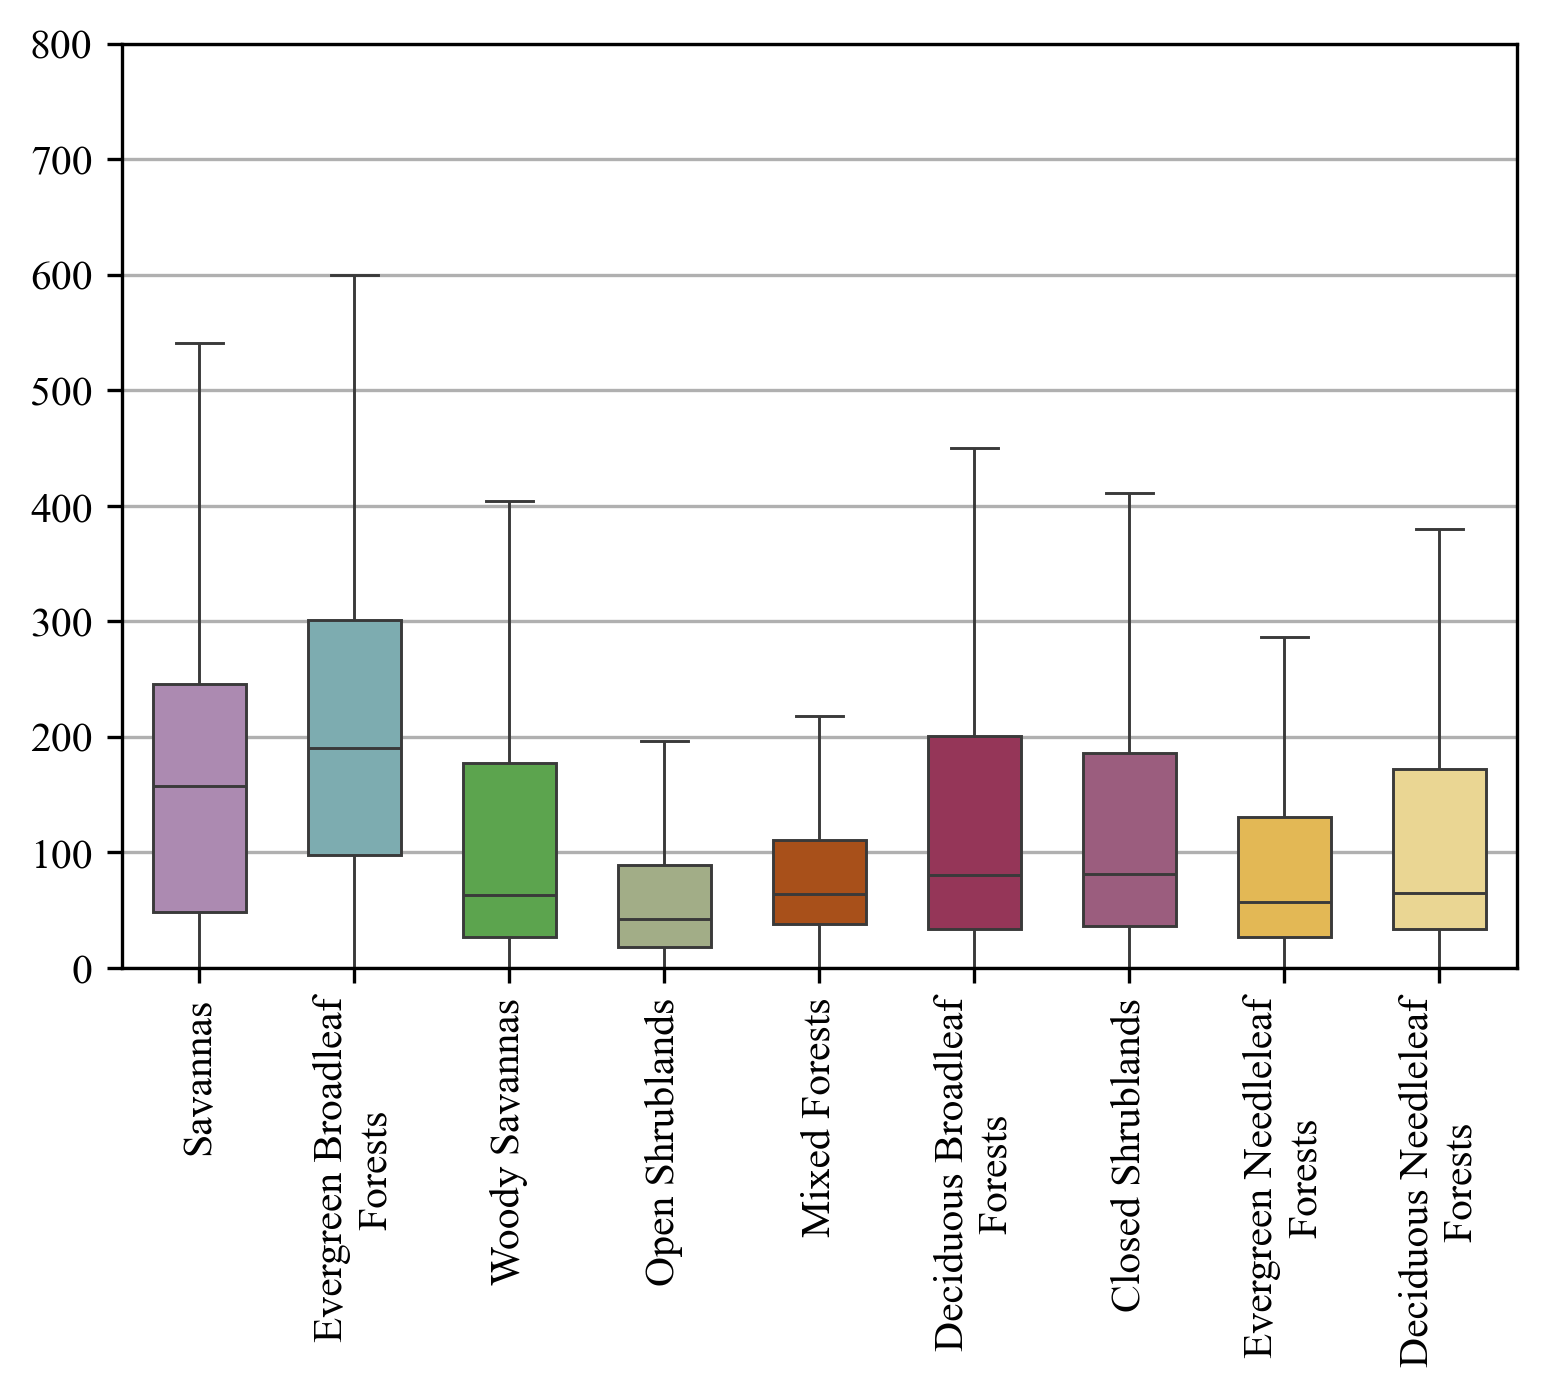

In [146]:
# Set fig size
f, ax = plt.subplots(figsize=(6, 4),dpi=300)
order = igbp_area_sum.index.tolist()
# sns.boxplot(x="IGBP", y="Sbedrock", data=df_IGBP, hue = "IGBP", width=.6, linewidth = .7, palette = land_aesthetics['color'].tolist(), whis = 1.5, showfliers = False)
sns.boxplot(x="IGBP", y="Sbedrock", data=df_IGBP_sorted, hue = "Area_sum", width=.6, linewidth = .7, palette = land_aesthetics_reorder_sorted['color'].tolist(), whis = 1.5, showfliers = False, order=order)
plt.legend().remove()
# plt.xticks(np.arange(0, 9, step=1), labels = land_aesthetics['name'], rotation = 'vertical') # rotation='25', ha="right"
plt.xticks(np.arange(0, 9, step=1), labels = land_aesthetics_reorder['name'], rotation = 'vertical') # rotation='25', ha="right"

# for i, label in enumerate(ax.get_xticklabels()):
#     x_pos = label.get_position()[0]
#     ax.text(x_pos+0.3, 85, f'{igbp_area_sum[i]:i4}', ha='center', va='bottom', fontsize=size1, fontweight='bold', color='black')
    
# Tweak the visual presentation
plt.xticks(rotation='vertical')
ax.set_axisbelow(True)
#ax.set_title('Biome')
ax.set_xlabel("")
ax.set_ylabel("")
ax.yaxis.grid(True)
ax.set_ylim(0, 800)
#ax.set_ylabel('$S_{bedrock}$ (mm)')

# Uncomment to download fig:
plt.rcParams['pdf.fonttype'] = 42
# plt.savefig(f"{fig_path}/b1_IGBP.pdf", transparent=True, bbox_inches='tight')
plt.savefig(f"{fig_path}/b1_IGBP_reorder.pdf", transparent=True, bbox_inches='tight')